In [3]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [6]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\PID\PID_C_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [7]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	8
float64		column 2	10
float64		column 3	8
float64		column 4	7
float64		column 5	10
float64		column 6	6
float64		column 7	7
float64		column 8	5


In [8]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,760.000000,758.000000,760.00000,761.00000,758.000000,762.000000,761.000000,763.000000
mean,3.828947,120.945910,69.07500,20.52431,79.529024,31.985039,0.472439,33.245085
std,3.348797,32.007528,19.42679,15.98049,115.242831,7.907679,0.332483,11.766493
min,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.00000,0.00000,0.000000,27.300000,0.243000,24.000000
50%,3.000000,117.000000,72.00000,23.00000,27.000000,32.000000,0.370000,29.000000
75%,6.000000,140.750000,80.00000,32.00000,126.750000,36.600000,0.627000,41.000000
max,17.000000,199.000000,122.00000,99.00000,846.000000,67.100000,2.420000,81.000000


<AxesSubplot:>

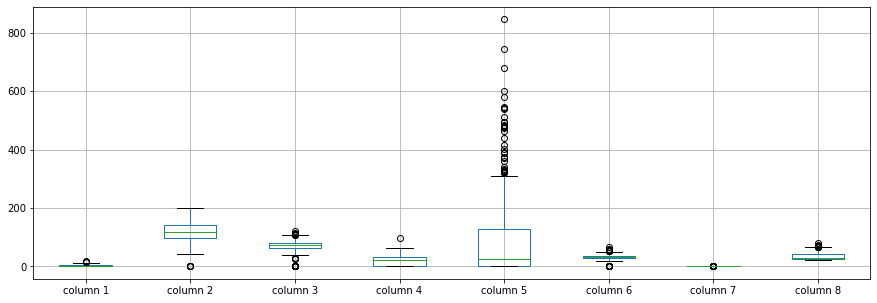

In [9]:
df.boxplot(return_type='axes', figsize=(15,5))

In [10]:
df.mean()

column 1      3.828947
column 2    120.945910
column 3     69.075000
column 4     20.524310
column 5     79.529024
column 6     31.985039
column 7      0.472439
column 8     33.245085
dtype: float64

In [11]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.136583,0.144157,-0.082563,-0.082981,0.017911,-0.025979,0.542429
column 2,0.136583,1.000000,0.152642,0.053759,0.323687,0.220969,0.134410,0.269155
column 3,0.144157,0.152642,1.000000,0.209288,0.092832,0.280990,0.037908,0.241715
column 4,-0.082563,0.053759,0.209288,1.000000,0.441295,0.388681,0.181494,-0.116176
column 5,-0.082981,0.323687,0.092832,0.441295,1.000000,0.200307,0.190107,-0.043396
column 6,0.017911,0.220969,0.280990,0.388681,0.200307,1.000000,0.139100,0.031938
column 7,-0.025979,0.134410,0.037908,0.181494,0.190107,0.139100,1.000000,0.031461
column 8,0.542429,0.269155,0.241715,-0.116176,-0.043396,0.031938,0.031461,1.000000


In [12]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [13]:
imputer = md.Midas(layer_structure = [8,8+34,8+34+34,8+34+34+34,8+34+34+34+34,8+34+34+34,8+34+34,8+34,8], vae_layer = False, seed = 34)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 422.6482238769531
Epoch: 1 , loss: 422.9661038716634
Epoch: 2 , loss: 424.5087038675944
Epoch: 3 , loss: 422.4033489227295
Epoch: 4 , loss: 421.3751627604167
Epoch: 5 , loss: 420.4371808369954
Epoch: 6 , loss: 417.2258179982503
Epoch: 7 , loss: 400.33105087280273
Epoch: 8 , loss: 387.7563126881917
Epoch: 9 , loss: 382.01943079630536
Epoch: 10 , loss: 374.848429997762
Epoch: 11 , loss: 368.28813044230145
Epoch: 12 , loss: 361.77664438883465
Epoch: 13 , loss: 358.326873143514
Epoch: 14 , loss: 348.0411049524943
Epoch: 15 , loss: 341.33294645945233
Epoch: 16 , loss: 335.88342539469403
Epoch: 17 , loss: 332.8539581298828
Epoch: 18 , loss: 326.0240198771159
Epoch: 19 , loss: 316.71762498219806
Epoch: 20 , loss: 305.70313930511475
Epoch: 21 , loss: 313.23164399464923
Epoch: 22 , loss: 306.3693765004476
Epoch: 23 , loss: 302.18106174468994
Epoch: 24 , loss: 299.92954540252686
Epoch: 25 , loss: 296.259092966715

In [14]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(768, 8)

In [15]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     8.000
column 2    99.000
column 3    84.000
column 4     0.000
column 5     0.000
column 6    35.400
column 7     0.388
column 8    50.000
Name: 21, dtype: float64

In [16]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\PID.xlsx', header=None,names=column_names)

In [17]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [18]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [19]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [20]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(488.672145264372, 5776.576248839705)

In [21]:
NRMS=numerator/denominator
NRMS


0.08459546350877437

In [22]:
new_df.iloc[66,:]

column 1      0.000000
column 2    109.000000
column 3     88.000000
column 4     30.000000
column 5     36.189537
column 6     32.500000
column 7      0.855000
column 8     38.000000
Name: 66, dtype: float64

In [23]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [24]:
imputations[-1].to_excel("PID_C_1.xlsx", index=False, header=False)